# Лабораторная работа №1

## Решение задачи Кеплера и исследование траектории движения тела в фазовом пространстве

### Цель работы
Решить систему обычных дифференциальных уравнений (задача Кеплера),
начертить график траектории движения тела в потенциальном поле.

### Ключевые понятия
Задача Кеплера (Kepler problem), фазовое пространство (phase space)

### Теоретические основы

Рассматривается тело массы $m$, которое движется вокруг тела массы $M$ под действием гравитационной силы.
Исходя из закона всемирного тяготения, мы можем записать уравнение движения в виде:
$$m \cdot \frac{d^2 r}{dt^2} = -\frac{mGM}{r^3},$$
где $r$ -- вектор, направленный от тела массы $M$ до тела массы $m$, а $G$ -- это постоянная тяготения,
которая равна $G = 6.67 \cdot 10^{-11}$ м$^3/$кг$\cdot c^2$.
В плоскости движения $\left( x - y \right) $, если разместить начало координат в точке нахождения тела массы $M$,
уравнение можно представить в виде системы:
$$\begin{cases}
\frac{d^2 x}{dt^2} = -\frac{GM}{r^3} \cdot x, \\
\frac{d^2 y}{dt^2} = -\frac{GM}{r^3} \cdot y,
\end{cases}$$
где $r^2 = x^2 + y^2$.
При заданных начальных условиях $x_0, y_0, \dot{x}_0, \dot{y}_0$ и при $t = 0$ траектория движения тела массы $m$
полностью определеяется системой.

Это пара связанных уравнений второго порядка.
Чтобы решить эту систему с помощью `SciPy`,
мы должны сначала преобразовать её в систему дифференциальных уравнений первого порядка.
Введём две переменные: $y_1 = x_1', y_2 = x_2'$.

Мы можем переписать два уравнения второго порядка в виде следующей системы четырёх уравнений первого порядка:
$$\begin{cases}
x_1' = y_1, \\
x_2' = y_2, \\
y_1' = -\frac{GM}{\left( x_1^2 + x_2^2 \right)^{\frac{3}{2}}} \cdot x_1, \\
y_2' = -\frac{GM}{\left( x_1^2 + x_2^2 \right)^{\frac{3}{2}}} \cdot x_2.
\end{cases}$$
Эти уравнения сейчас имеют такую форму, которую мы можем реализовать в `Python`.

Следующий код определяет правую часть системы уравнений (также называемую векторным полем).
Аргументы функции `vectorfield` сконфигурированы для использования в функции `odeint`: время $t$ --
это второй аргумент.

In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for Kepler problem.
    
    Arguments:
        w : vectorof the state variables:
            w = [x1, y1, x2, y2]
        t : time
        p : vector of parameters:
            p = [G, M]
    """
    x1, y1, x2, y2 = w
    G, M = p
    #Create f = (x1', y1', x2', y2'):
    f = [y1, 
        -G * M * x1 / (x1 ** 2 + x2 ** 2) ** (1.5),
        y2,
        -G * M * x2 / (x1 ** 2 + x2 ** 2) ** (1.5)]
    return f

Далее -- код, который использует `odeint`, чтобы решить уравнения для заданного набора значений параметров,
начальных состояний и временного интервала.

In [2]:
""" Use ODEINT to solve the differential equations defined by the vector field """
from scipy.integrate import odeint
# Parameter values
# Gravitational constant:
G = 6.67 * 10 ** (-11)
# Mass:
M = 6 * 10 ** 24

# Initial conditions
# x and y are the initial displacements; x1 and y1 are the initial velocities
x1 = -10 ** 6
x2 = -10 ** 8
y1 = 0
y2 = 10 ** 9

# ODE solver parameters
stoptime = 100.0
numpoints = 10

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [G, M]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,))

In [3]:
from pandas import DataFrame
result = DataFrame(wsol, columns=['x', 'dx/dt', 'y', 'dy/dt'])
result['t'] = t
result

,x,dx/dt,y,dy/dt,t
0,-1000000.000000,0.000000,-1.000000e+08,1.000000e+09,0.000000
1,-999991.186920,0.800381,1.101111e+10,1.000000e+09,11.111111
2,-999982.293798,0.800381,2.212222e+10,1.000000e+09,22.222222
3,-999973.400676,0.800381,3.323333e+10,1.000000e+09,33.333333
4,-999964.507554,0.800381,4.434444e+10,1.000000e+09,44.444444
5,-999955.614432,0.800381,5.545556e+10,1.000000e+09,55.555556
6,-999946.721310,0.800381,6.656667e+10,1.000000e+09,66.666667
7,-999937.828188,0.800381,7.767778e+10,1.000000e+09,77.777778
8,-999928.935066,0.800381,8.878889e+10,1.000000e+09,88.888889
9,-999920.041943,0.800381,9.990000e+10,1.000000e+09,100.000000


Следующий код использует `Matplotlib`, чтобы изобразить решение.

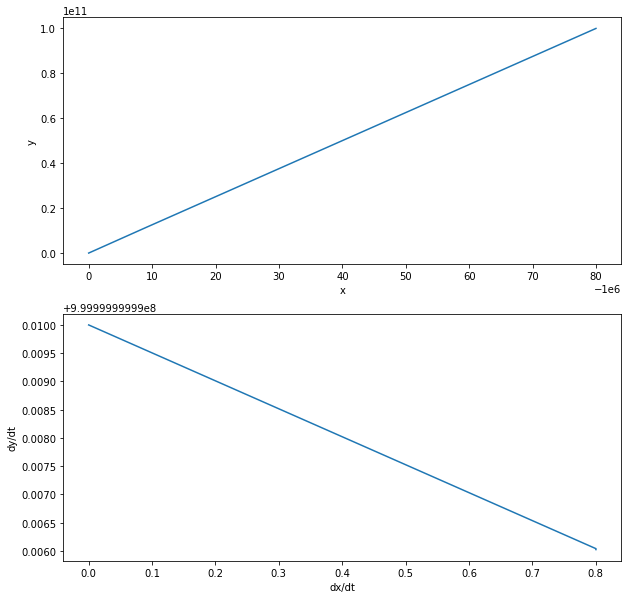

In [4]:
"""Plot the solution"""
from matplotlib.pyplot import subplot, plot, figure, show

f = figure(figsize=(10,10))

ax = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax.plot(wsol[:,0], wsol[:,2])
ax2.plot(wsol[:,1], wsol[:,3])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax2.set_xlabel('dx/dt')
ax2.set_ylabel('dy/dt')

show()

### Контрольные вопросы
#### 1
Какую физическую систему описывает задание Кеплера?
Из каких принципов выволилась система уравнений?
Система линейная или нелинейная и какого порядка?

*Ответ: Задание Кеплера описывает движение тела массы $m$,
которое движется вокруг тела массы $M$ под действием гравитационной силы.
Для вывода системы уравнений был использован закон всемирного тяготения.
Начало координат разместили в точке нахождения тела массы $M$.
Получили нелинейную систему второго порядка.*

#### 2
Какое фазовое пространство системы?
Что такое проекции фазового пространства в данном задании?

*Ответ: Фазовое пространство системы -- плоскость $x-y$.
Проекции фазового пространства в данном задании -- ось $x$ и ось $y$.*

#### 3
Как вы реализовали решение систем О.Д.У. (каким методом)?

*Ответ: Решение системы О.Д.У. реализовано с помощью функции `odeint`.*

#### 4
Какая теоретическая и практическая точность используемого метода?
Какие шаги реализовуются в ваших расчётах?

*Ответ*: По умолчанию значение точности в `odeint` установлено $1.49012 * 10^{-8}$.
В функции `vectorfield` реализован расчёт правой части системы уравнений.
Далее происходит интегрирование системы функцией `odeint`.
Для этого заданы параметры (константы), начальные данные и дискретизировано время.

#### 5
Какие стационарные точки имеет система Кеплера?

*Ответ: $x_1, x_2, y_1, y_2 = 0$.*

#### 6
От какого количества параметров зависит решение данной физической задачи?

*Ответ: решение данной физическо задачи зависит от четырёх начальных значений и двух параметров (констант).*

#### 7
К каким эффектам приводит смена начальных условий?

*Ответ: смена начальных условий приводит к изменению решения.*

#### 8
Какое движение получается исходя из рисунков?

*Ответ: Движение поступательное с вращательной компонентой.*

#### 9
Как зависит движение от времени?

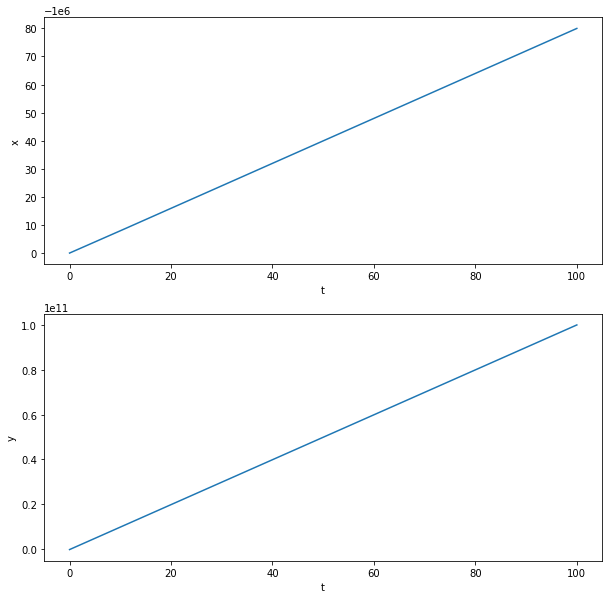

In [5]:
f = figure(figsize=(10,10))

ax = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax.plot(t, wsol[:,0])
ax2.plot(t, wsol[:,2])

ax.set_xlabel('t')
ax.set_ylabel('x')
ax2.set_xlabel('t')
ax2.set_ylabel('y')

show()

*Ответ: движение вдоль оси $x$ прямолинейное, вдоль оси $y$ -- по параболе.*